<a href="https://colab.research.google.com/github/MuizSarwar/learnML/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#All libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [10]:
#load dataset and train test split
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Model Declaration
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbr.fit(X_train, y_train)
pred_y = gbr.predict(X_test)

mse = mean_squared_error(y_test, pred_y)
r2 = r2_score(y_test, pred_y)
mse, r2

(0.2939973248643864, 0.7756446042829697)

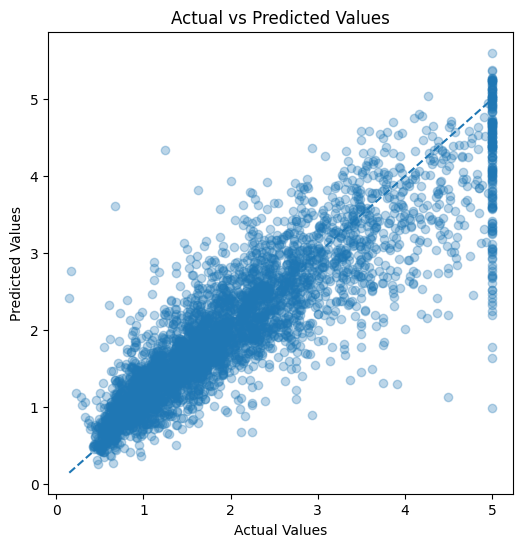

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_y, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

##Find best hyperparmeter using ( GridSearchCv )

In [16]:
param_grid = {
    'n_estimators': [50,100, 200,300],
    'learning_rate': [0.01,0.05,0.1],
    'max_depth': [1,2]
}


grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1

)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300}


In [18]:
#Best Model Declaration ( Applying the best hyperparameters )
best_gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=2,
    random_state=42
)
best_gbr.fit(X_train, y_train)
best_pred_y = best_gbr.predict(X_test)

mse = mean_squared_error(y_test, best_pred_y)
r2 = r2_score(y_test, best_pred_y)
mse, r2

(0.2830592063904641, 0.7839917071001419)

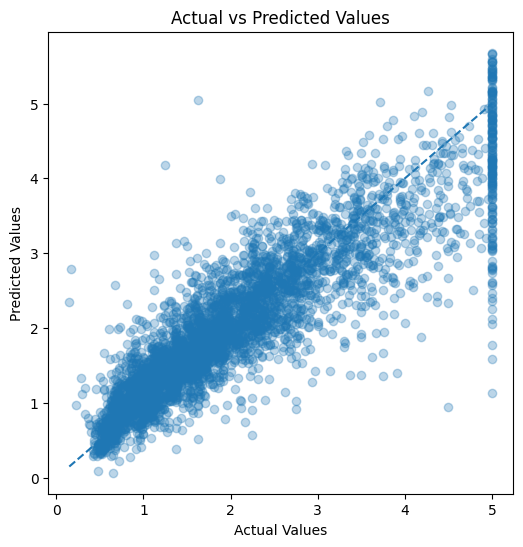

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, best_pred_y, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()